## Packages

In [1]:
from datetime import datetime, timedelta
import pandas as pd
import os
from sunpy.net import Fido, attrs as a
from sunpy.timeseries import TimeSeries
from sunpy.timeseries.sources.goes import XRSTimeSeries
import astropy.units as u
from sunkit_instruments.goes_xrs import calculate_temperature_em
import matplotlib.pyplot as plt
import numpy as np
from sunpy.data import manager
import netCDF4 as nc
import os
import pandas as pd
from datetime import datetime, timedelta
import copy
from matplotlib import colormaps
list(colormaps)
#from colorspacious import cspace_converter
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates
from matplotlib.ticker import LogFormatter
from matplotlib.ticker import LogFormatterMathtext
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import seaborn as sns
import re
import glob

## Parameters

In [2]:
n=185
# nuevo número de días
new_n = 148
fecha_actual = "2025-11-11"

window_minutes=30
fai_temp_range = (7, 14)
fai_em_threshold = 0.005
date_column = "date"
duration = True
FAI_duration = 3
filter_flare_coincidence = True
method = "filtered" # "all", "true" o "filtered"

## Carpeta para gráficas

In [47]:
analysis_dir = os.path.join(f"Analysis_FAI")
# Crear carpeta de análisis (si no existe) y mostrar mensaje
if os.path.exists(analysis_dir ):
    print(f"⚠️ La carpeta de análisis ya existía: {analysis_dir }")
else:
    os.makedirs(analysis_dir , exist_ok=True)
    print(f"📁 Carpeta de análisis creada: {analysis_dir}")

# Crear subcarpeta para guardar resultados de análisis
analysis_esp = os.path.join(analysis_dir, f"Analysis_FAI_T{fai_temp_range[0]}-{fai_temp_range[1]}_EM{fai_em_threshold}_dur{FAI_duration}min")
# Crear carpeta de análisis (si no existe) y mostrar mensaje
if os.path.exists(analysis_esp ):
    print(f"⚠️ La carpeta de análisis ya existía: {analysis_esp }")
else:
    os.makedirs(analysis_esp , exist_ok=True)
    print(f"📁 Carpeta de análisis creada: {analysis_esp}")

folder = f"Graphics_{method}_W{window_minutes}min"

# Crear subcarpeta para guardar resultados de análisis
graphics_dir = os.path.join(analysis_esp, folder)
# Crear subcarpeta para guardar resultados de análisis (si no existe) y mostrar mensaje
if os.path.exists(graphics_dir):
    print(f"⚠️ La carpeta de análisis ya existía: {graphics_dir}")
else:
    os.makedirs(graphics_dir , exist_ok=True)
    print(f"📁 Carpeta de análisis creada: {graphics_dir}")




⚠️ La carpeta de análisis ya existía: Analysis_FAI
⚠️ La carpeta de análisis ya existía: Analysis_FAI/Analysis_FAI_T7-14_EM0.005_dur3min
⚠️ La carpeta de análisis ya existía: Analysis_FAI/Analysis_FAI_T7-14_EM0.005_dur3min/Graphics_filtered_W30min


## Valid Data 

In [3]:
output_dir = f"Data_for_{n}_days"

# Path of cleaned data in csv
csv_path_full_valid = f"{output_dir}/df_full_{new_n}_valid.csv"
# Path of valid flares: 
csv_path_flares = f"{output_dir}/df_flares_{new_n}_valid.csv"
# Path of df_full
csv_path_full = f"{output_dir}/all_df_full_{n}.csv"

# Verificar existencia de archivos y avisar
if not os.path.exists(csv_path_full_valid):
    print(f"⚠️ No se encontró el archivo GOES: {csv_path_full_valid}")
else:
    print(f"✅ Archivo GOES encontrado: {csv_path_full_valid}")

if not os.path.exists(csv_path_flares):
    print(f"⚠️ No se encontró el archivo de flares: {csv_path_flares}")
else:
    print(f"✅ Archivo de flares encontrado: {csv_path_flares}")

if not os.path.exists(csv_path_full):
    print(f"⚠️ No se encontró el archivo de flares: {csv_path_full}")
else:
    print(f"✅ Archivo de flares encontrado: {csv_path_full}")



✅ Archivo GOES encontrado: Data_for_185_days/df_full_148_valid.csv
✅ Archivo de flares encontrado: Data_for_185_days/df_flares_148_valid.csv
✅ Archivo de flares encontrado: Data_for_185_days/all_df_full_185.csv


In [4]:
df_full_valid = pd.read_csv(csv_path_full_valid)
df_flares_valid = pd.read_csv(csv_path_flares)
df_full = pd.read_csv(csv_path_full)

## Data_method

In [5]:

analysis_dir = os.path.join(f"Analysis_FAI")
# Crear carpeta de análisis (si no existe) y mostrar mensaje
if os.path.exists(analysis_dir ):
    print(f"⚠️ La carpeta de análisis ya existía: {analysis_dir }")
else:
    os.makedirs(analysis_dir , exist_ok=True)
    print(f"📁 Carpeta de análisis creada: {analysis_dir}")

# Crear subcarpeta para guardar resultados de análisis
analysis_esp = os.path.join(analysis_dir, f"Analysis_FAI_T{fai_temp_range[0]}-{fai_temp_range[1]}_EM{fai_em_threshold}_dur{FAI_duration}min")
# Crear carpeta de análisis (si no existe) y mostrar mensaje
if os.path.exists(analysis_esp ):
    print(f"⚠️ La carpeta de análisis ya existía: {analysis_esp }")
else:
    os.makedirs(analysis_esp , exist_ok=True)
    print(f"📁 Carpeta de análisis creada: {analysis_esp}")

# Path of anticipation_time
csv_path_anticipation_time = f"{analysis_esp}/df_anticipation_time_{method}_(W_{window_minutes})_T{fai_temp_range[0]}-{fai_temp_range[1]}_EM{fai_em_threshold}_dur{FAI_duration}min.csv"
# Path of fai_all
csv_path_fai_all = f"{analysis_esp}/df_fai_all_T{fai_temp_range[0]}-{fai_temp_range[1]}_EM{fai_em_threshold}_dur{FAI_duration}min.csv"
# Path of fai_selected
csv_path_fai_selected = f"{analysis_esp}/df_fai_{method}_T{fai_temp_range[0]}-{fai_temp_range[1]}_EM{fai_em_threshold}_dur{FAI_duration}min.csv"
# Path of df_fai_assoc
csv_path_fai_assoc = f"{analysis_esp}/df_fai_assoc2_{method}_(W_{window_minutes})_T{fai_temp_range[0]}-{fai_temp_range[1]}_EM{fai_em_threshold}_dur{FAI_duration}min.csv"

if not os.path.exists(csv_path_anticipation_time):
    print(f"⚠️ No se encontró el archivo de flares: {csv_path_anticipation_time}")
else:
    print(f"✅ Archivo de flares encontrado: {csv_path_anticipation_time}")
if not os.path.exists(csv_path_fai_all):
    print(f"⚠️ No se encontró el archivo de flares: {csv_path_fai_all}")
else:
    print(f"✅ Archivo de flares encontrado: {csv_path_fai_all}")
if not os.path.exists(csv_path_fai_selected):
    print(f"⚠️ No se encontró el archivo de flares: {csv_path_fai_selected}")
else:
    print(f"✅ Archivo de flares encontrado: {csv_path_fai_selected}")
if not os.path.exists(csv_path_fai_assoc):
    print(f"⚠️ No se encontró el archivo de flares: {csv_path_fai_assoc}")
else:
    print(f"✅ Archivo de flares encontrado: {csv_path_fai_assoc}")



⚠️ La carpeta de análisis ya existía: Analysis_FAI
⚠️ La carpeta de análisis ya existía: Analysis_FAI/Analysis_FAI_T7-14_EM0.005_dur3min
✅ Archivo de flares encontrado: Analysis_FAI/Analysis_FAI_T7-14_EM0.005_dur3min/df_anticipation_time_filtered_(W_30)_T7-14_EM0.005_dur3min.csv
✅ Archivo de flares encontrado: Analysis_FAI/Analysis_FAI_T7-14_EM0.005_dur3min/df_fai_all_T7-14_EM0.005_dur3min.csv
✅ Archivo de flares encontrado: Analysis_FAI/Analysis_FAI_T7-14_EM0.005_dur3min/df_fai_filtered_T7-14_EM0.005_dur3min.csv
✅ Archivo de flares encontrado: Analysis_FAI/Analysis_FAI_T7-14_EM0.005_dur3min/df_fai_assoc2_filtered_(W_30)_T7-14_EM0.005_dur3min.csv


In [6]:
df_anticipation_time = pd.read_csv(csv_path_anticipation_time)
df_fai_all = pd.read_csv(csv_path_fai_all)
df_fai_selected = pd.read_csv(csv_path_fai_selected)
df_fai_assoc = pd.read_csv(csv_path_fai_assoc)

## dfs columns to datatime

In [7]:
df_full_valid["date"] = pd.to_datetime(df_full_valid["date"])
df_flares_valid["StartTime"] = pd.to_datetime(df_flares_valid["StartTime"])
df_flares_valid["PeakTime"]  = pd.to_datetime(df_flares_valid["PeakTime"])
df_flares_valid["EndTime"]   = pd.to_datetime(df_flares_valid["EndTime"])
df_anticipation_time["StartTime"] = pd.to_datetime(df_anticipation_time["StartTime"])
df_anticipation_time["PeakTime"]  = pd.to_datetime(df_anticipation_time["PeakTime"])
df_anticipation_time["EndTime"]   = pd.to_datetime(df_anticipation_time["EndTime"])
df_fai_selected["date"] = pd.to_datetime(df_fai_selected["date"])

## Funciones gráficas

In [8]:
# Plot with ticks every minute
def plot_fai_and_flare_lines(df_combined, df_fai_selected, df_fai_all, df_flare_data, 
                              flare_start_time, flare_end_time, graphics_dir,
                              ymin=1e-9, ymax=1e-4):
    """
    Plots XRS A and B on a logarithmic scale with vertical lines for FAI events and flare times.
    df_fai_all: all candidate FAI events
    df_fai_selected: FAI events selected by a method
    """
    import matplotlib.dates as mdates
    import os
    
    # Ensure time types
    flare_start_time = pd.to_datetime(flare_start_time)
    flare_end_time = pd.to_datetime(flare_end_time)
    
    print(f"Buscando datos entre: {flare_start_time} y {flare_end_time}")

    # Convert date columns to datetime if they aren't already
    df_combined['date'] = pd.to_datetime(df_combined['date'])
    df_fai_selected['date'] = pd.to_datetime(df_fai_selected['date'])
    df_fai_all['date'] = pd.to_datetime(df_fai_all['date'])
    df_flare_data['StartTime'] = pd.to_datetime(df_flare_data['StartTime'])
    df_flare_data['PeakTime'] = pd.to_datetime(df_flare_data['PeakTime'])
    df_flare_data['EndTime'] = pd.to_datetime(df_flare_data['EndTime'])

    # DEBUG: Verificar rangos de fechas en los dataframes
    print(f"Rango df_combined: {df_combined['date'].min()} a {df_combined['date'].max()}")
    print(f"Rango df_fai_selected: {df_fai_selected['date'].min()} a {df_fai_selected['date'].max()}")
    print(f"Rango df_flare_data PeakTime: {df_flare_data['PeakTime'].min()} a {df_flare_data['PeakTime'].max()}")

    # Filter data based on date column - método más robusto
    mask_combined = (df_combined['date'] >= flare_start_time) & (df_combined['date'] <= flare_end_time)
    df_plot = df_combined.loc[mask_combined].copy()
    
    mask_fai = (df_fai_selected['date'] >= flare_start_time) & (df_fai_selected['date'] <= flare_end_time)
    df_fai_interval = df_fai_selected.loc[mask_fai].copy()

    mask_fai_all = (df_fai_all['date'] >= flare_start_time) & (df_fai_all['date'] <= flare_end_time)
    df_fai_all_interval = df_fai_all.loc[mask_fai_all].copy()


    # DEBUG: Verificar cuántos datos encontramos
    print(f"Datos en df_plot: {len(df_plot)}")
    print(f"Datos en df_fai_interval: {len(df_fai_interval)}")

    # Si no hay datos en el rango, mostrar advertencia
    if len(df_plot) == 0:
        print(f"¡ADVERTENCIA! No hay datos en df_combined para el rango {flare_start_time} a {flare_end_time}")
        return

    plt.rcParams.update({
        "axes.titlesize": 16, "axes.labelsize": 16, 
        "xtick.labelsize": 15, "ytick.labelsize": 15, 
        "legend.fontsize": 13
    })

    # Create figure
    fig, ax = plt.subplots(figsize=(13, 5))

    # Plot XRS A and B usando el índice numérico para evitar problemas con fechas
    x_vals = range(len(df_plot))  # Usar índice numérico para el plotting
    ax.plot(x_vals, df_plot['xrsa'], label='XRS A', color='blue', linewidth=1)
    ax.plot(x_vals, df_plot['xrsb'], label='XRS B', color='red', linewidth=1)

    # Log scale and Y-axis limits
    ax.set_yscale('log')
    ax.set_ylim(ymin, ymax)
    ax.set_ylabel('X-ray Flux [W/m²]')
    ax.set_xlabel(f"Time [UTC] – {flare_start_time:%d %b %Y}")
    ax.set_title(f'XRS A and B with FAI and Flare Times\n{flare_start_time:%Y-%m-%d %H:%M} to {flare_end_time:%H:%M}')
    ax.grid(True, alpha=0.3)
    
    # -----------------------
    # Configure X axis ticks
    # -----------------------
    # Crear un array de minutos dentro del intervalo de flare
    start_time = flare_start_time
    end_time = flare_end_time

    # Generar ticks mayores cada 10 minutos
    major_times = pd.date_range(start=start_time.ceil('10min'), end=end_time, freq='10min')
    major_indices = [(np.abs(df_plot['date'] - t)).argmin() for t in major_times]
    major_labels = [t.strftime('%H:%M') for t in major_times]

    # Generar ticks menores cada 1 minuto
    minor_times = pd.date_range(start=start_time.ceil('1min'), end=end_time, freq='1min')
    minor_indices = [(np.abs(df_plot['date'] - t)).argmin() for t in minor_times]

    # Asignar ticks al eje X
    ax.set_xticks(major_indices)
    ax.set_xticklabels(major_labels)
    ax.set_xticks(minor_indices, minor=True)  # minor ticks sin etiquetas
    

    # -----------------------
    # Plot all FAI candidates (background)
    # -----------------------
    for i, fai_time in enumerate(df_fai_all_interval['date']):
        idx = (np.abs(df_plot['date'] - fai_time)).argmin()
        ax.axvline(x=idx, color='#FF69B4', linestyle='-', linewidth=1.5, alpha=0.7,
                   label='FAI Candidate' if i == 0 else "")


    # Red vertical lines: FAI events
    for fai_time in df_fai_interval['date']:
        # Encontrar la posición en el plot para este tiempo FAI
        time_diff = np.abs(df_plot['date'] - fai_time)
        if len(time_diff) > 0:
            idx = time_diff.argmin()
            ax.axvline(x=idx, color='red', linestyle='-', linewidth=1.5, alpha=0.7,
                      label='FAI Alert' if fai_time == df_fai_interval['date'].iloc[0] else "")

    # Encontrar fulguraciones en el intervalo de tiempo
    flares_in_interval = df_flare_data[
        (df_flare_data['PeakTime'] >= flare_start_time) & 
        (df_flare_data['PeakTime'] <= flare_end_time)
    ]
    
    print(f"Fulguraciones encontradas en el intervalo: {len(flares_in_interval)}")

    # Colores y estilos para los diferentes tiempos de las fulguraciones
    for idx, (_, row) in enumerate(flares_in_interval.iterrows()):
        start_time = row['StartTime']
        peak_time = row['PeakTime']
        end_time = row['EndTime']
        flare_class = row.get('Class', '')
        
        # Función para encontrar la posición en el plot
        def find_time_position(time_val):
            time_diff = np.abs(df_plot['date'] - time_val)
            if len(time_diff) > 0:
                return time_diff.argmin()
            return None
        
        # Línea verde punteada para StartTime
        if flare_start_time <= start_time <= flare_end_time:
            start_pos = find_time_position(start_time)
            if start_pos is not None:
                ax.axvline(x=start_pos, color='green', linestyle=(0, (5, 3)), linewidth=2, alpha=0.8,
                          label='Flare Start' if idx == 0 else "")
        
        # Línea azul discontinua para PeakTime
        if flare_start_time <= peak_time <= flare_end_time:
            peak_pos = find_time_position(peak_time)
            if peak_pos is not None:
                #ax.axvline(x=peak_pos, color='blue', linestyle='--', linewidth=2, alpha=0.8,
                ax.axvline(x=peak_pos, color='blue', linestyle=(0, (5, 3)), linewidth=2, alpha=0.8,
                          label='Flare Peak' if idx == 0 else "")
                
                # AÑADIR FLECHA QUE SEÑALA EL PEAK
                # Encontrar el valor de flujo en el peak time
                peak_flux = None
                peak_time_diff = np.abs(df_plot['date'] - peak_time)
                if len(peak_time_diff) > 0:
                    peak_idx = peak_time_diff.argmin()
                    # Usar el mayor flujo entre XRS A y XRS B
                    peak_flux = max(df_plot['xrsa'].iloc[peak_idx], df_plot['xrsb'].iloc[peak_idx])
                

        
        # Línea amarilla punteada para EndTime
        if flare_start_time <= end_time <= flare_end_time:
            end_pos = find_time_position(end_time)
            if end_pos is not None:
                ax.axvline(x=end_pos, color='orange', linestyle='--', linewidth=3, alpha=0.8,
                          label='Flare End' if idx == 0 else "")
        
        # Anotación con la clase de la fulguración Y FLECHA
        if flare_class and (flare_start_time <= peak_time <= flare_end_time):
            peak_pos = find_time_position(peak_time)
            if peak_pos is not None:
                ax.annotate(flare_class,
                            xy=(peak_pos, ymin * 5),  # Punto destino
                            xytext=(peak_pos + 1, ymin * 15),  # Punto origen (más a la derecha y arriba)
                            fontsize=9,
                            color='darkblue',
                            rotation=0,
                            ha='left',
                            va='center',
                            bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="darkblue", lw=1, alpha=0.8),
                            arrowprops=dict(arrowstyle='->',  # Flecha
                                          color='darkblue',
                                          lw=1,
                                          alpha=0.7,
                                          shrinkA=5,  # Espacio en el origen
                                          shrinkB=0))  # Sin espacio en el destino

    # Final layout with proper legend handling
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Remove duplicates
    ax.legend(by_label.values(), by_label.keys(), loc="upper right")
    

    fig.tight_layout()

    # Create graphics directory if it doesn't exist
    #graphics_dir = "graphics"
    #os.makedirs(graphics_dir, exist_ok=True)

    #en esta función se recibe el directorio como parámetro
    
    output_name = f"FAI_{flare_start_time:%Y%m%d_%H%M}_{flare_end_time:%H%M}.png"
    output_path = os.path.join(graphics_dir, output_name)
    plt.savefig(output_path, dpi=300, bbox_inches="tight")
    plt.show()


#gráfica ce flux vs EM y T
def plot_xrs_vs_te_simple(days, 
                         df_full_valid, 
                         df_flares_valid, 
                         time_column="PeakTime",
                         XRS="xrsb_corr", T="T_cor", EM="EM_cor_norm",
                         color_by=None,
                         palette="viridis",  
                         class_to_color=None):
    """
    Versión simplificada que asume que podemos hacer merge por tiempo
    """
    
    # Convertir a datetime
    df_full_valid['date'] = pd.to_datetime(df_full_valid['date'])
    df_flares_valid[time_column] = pd.to_datetime(df_flares_valid[time_column])
    
    # Hacer merge de los dataframes
    df_merged = pd.merge(df_flares_valid, df_full_valid, 
                        left_on=time_column, 
                        right_on='date', 
                        how='inner')
    
    if len(df_merged) == 0:
        print("No hay coincidencias entre los dataframes.")
        return
    
    # Filtrar datos válidos
    valid_data = df_merged.dropna(subset=[XRS, T, EM])
    
    if len(valid_data) == 0:
        print("No hay datos válidos después de filtrar NaNs.")
        return
    
    print(f"Datos válidos para graficar: {len(valid_data)}")
    
    # Preparar datos
    xrs_vals = valid_data[XRS].values
    em_vals = valid_data[EM].values
    t_vals = valid_data[T].values
    
    # Preparar labels para colores
    if color_by == "Class":
        flare_labels = valid_data["Class"].astype(str).str[0].tolist()  # solo letra B,C,M,X
    elif color_by == "Date":
        flare_labels = valid_data[time_column].dt.date.astype(str).tolist()
    elif color_by == "observatory":
        flare_labels = valid_data["observatory"].fillna("Unknown").tolist()
    else:
        flare_labels = [""] * len(valid_data)

    # --- Colores según selección ---
    if color_by:
        labels = sorted(set(flare_labels))
        if class_to_color is None:
            cmap = plt.get_cmap(palette, len(labels))
            class_to_color = {lab: cmap(i) for i, lab in enumerate(labels)}
        colors = [class_to_color[lab] for lab in flare_labels]
    else:
        labels = []
        colors = "blue"

    # Configuración de plot
    plt.rcParams.update({
        "axes.titlesize": 17, "axes.labelsize": 15,
        "xtick.labelsize": 16, "ytick.labelsize": 16,
        "legend.fontsize": 16
    })

    fig, axes = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True)

    # XRS vs EM
    axes[0].scatter(em_vals, xrs_vals, c=colors, alpha=0.7, s=50)
    axes[0].set_xlabel(rf"EM$_{{49}}$ [cm$^{{-3}}$]")
    axes[0].set_ylabel(rf"{XRS} [W/m$^2$]")
    axes[0].set_title(f"X-ray flux vs Emission Measure\n{days} days ({time_column})", pad=20)
    axes[0].set_xscale("log")
    axes[0].set_yscale("log")
    axes[0].set_xlim(0.001, None)
    
    # XRS vs T
    axes[1].scatter(t_vals, xrs_vals, c=colors, alpha=0.7, s=50)
    axes[1].set_xlabel(f"T [MK]")
    axes[1].set_ylabel(rf"{XRS} [W/m$^2$]")
    axes[1].set_title(f"X-ray flux vs Temperature\n{days} days ({time_column})", pad=20)
    axes[1].set_xscale("linear")
    axes[1].set_yscale("log")
    axes[1].set_xlim(0, 30)

    # Leyenda
    if color_by and labels:
        handles = [plt.Line2D([], [], marker="o", color=class_to_color[lab], linestyle="", 
                             label=str(lab), markersize=12) for lab in labels]
        
        n_labels = len(labels)

        # Obtener posición de los subplots combinados (en coordenadas de la figura)
        pos0 = axes[0].get_position()
        pos1 = axes[1].get_position()
        subplot_left = pos0.x0
        subplot_right = pos1.x1
        subplot_width = subplot_right - subplot_left
        
        # Número de columnas dinámico según ancho de subplots
        items_per_row = max(1, int(subplot_width * 12))  # escala arbitraria, ajustar si se quiere
        ncol = min(n_labels, items_per_row)
        n_rows = int(np.ceil(n_labels / ncol))

        fig.legend(handles=handles, title=color_by,
                  loc="upper center", bbox_to_anchor=(0.5, -0.05),
                  ncol=min(4, len(labels)), frameon=False,
                  title_fontsize=17) #tamaño de título

    # Guardar
    output_name = f"{days}d_{XRS}_vs_{T}_{EM}_{time_column}_{color_by}.png"
    output_path = os.path.join(graphics_dir, output_name)
    plt.savefig(output_path, dpi=300, bbox_inches="tight")
    plt.show()


##

# Gráficas

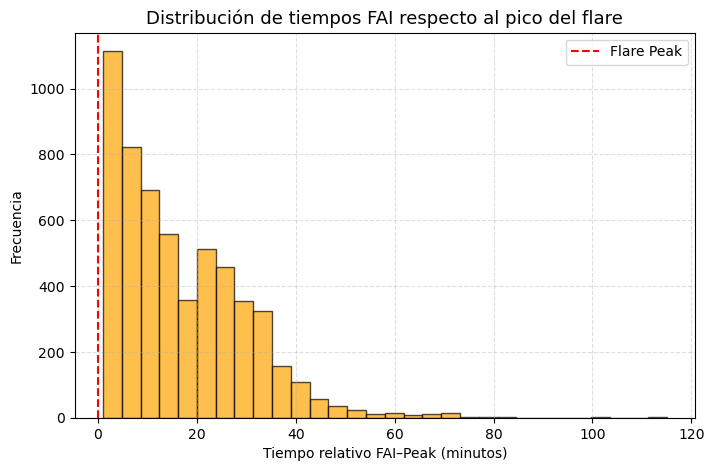

In [9]:
# Eliminar los valores NaN
data = df_fai_assoc["FAI_to_peak"].dropna()

plt.figure(figsize=(8, 5))
plt.hist(data, bins=30, color="orange", edgecolor="black", alpha=0.7)

# Línea vertical en 0 → indica el momento del pico del flare
plt.axvline(0, color="red", linestyle="--", label="Flare Peak")

plt.title("Distribución de tiempos FAI respecto al pico del flare", fontsize=13)
plt.xlabel("Tiempo relativo FAI–Peak (minutos)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


## Histograma de tiempos de anticipación

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

def plot_histogram_with_reference(df, column, delta_x=5, figsize=(10,5), 
                                 save_plot=False, graphics_dir=None, 
                                 plot_name=None, dpi=300,
                                 text_x=0.03, text_y=0.85): #text_x=0.79, text_y=0.65
                                                  #text_x=0.03, text_y=0.85
    """  
    Crea un histograma con línea de referencia en 0 y estadísticas
    
    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame que contiene los datos
    column : str
        Nombre de la columna a usar como referencia (ej: 'FAI_to_start')
    delta_x : int o float, default=5
        Tamaño de los bins en minutos
    figsize : tuple, default=(10,5)
        Tamaño de la figura
    save_plot : bool, default=False
        Si es True, guarda la gráfica
    graphics_dir : str, optional
        Directorio donde guardar las gráficas
    plot_name : str, optional
        Nombre del archivo de la gráfica. Si es None, se genera automáticamente
    dpi : int, default=300
        Resolución para guardar la imagen
    """
    
    # Datos
    x = df[column].dropna()
    
    # Definir bins centrando uno en 0
    min_val = x.min()
    max_val = x.max()
    min_val_ajustado = delta_x * np.floor(min_val / delta_x)
    max_val_ajustado = delta_x * np.ceil(max_val / delta_x)
    bin_edges = np.arange(min_val_ajustado, max_val_ajustado + delta_x, delta_x)

    # Calcular histograma
    counts, edges = np.histogram(x, bins=bin_edges)
    bin_width = edges[1] - edges[0]

    # DETERMINAR EL TIPO DE REFERENCIA SEGÚN EL NOMBRE DE LA COLUMNA
    column_lower = column.lower()
    if 'peak' in column_lower:
        reference_type = 'peak'
        reference_label = 'Flare peak'
        before_text = 'Before peak'
        after_text = 'After peak'
    elif 'end' in column_lower:
        reference_type = 'end'
        reference_label = 'Flare end'
        before_text = 'Before end'
        after_text = 'After end'
    else:  # Por defecto o si contiene 'start'
        reference_type = 'start'
        reference_label = 'Flare start'
        before_text = 'Before start'
        after_text = 'After start'

    # Título de la gráfica
    plot_title = f'Histogram of anticipation time relative to {reference_type}'

    # Gráfica
    plt.figure(figsize=figsize)
    plt.hist(x, bins=bin_edges, color='orange', edgecolor='black', alpha=0.6)

    # Líneas de referencia
    plt.axvline(0, color='red', linestyle='--', linewidth=2, label=reference_label)
    plt.axvline(min_val, color='blue', linestyle=':', linewidth=2, label=f'Min = {min_val:.1f}')
    plt.axvline(max_val, color='green', linestyle=':', linewidth=2, label=f'Max = {max_val:.1f}')

    # Etiquetas
    plt.xlabel(f'{column} (minutes relative to flare start)', fontsize=12)
    plt.ylabel('Number of FAIs', fontsize=12)
    plt.title(plot_title, fontsize=14)
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    
    # CONFIGURACIÓN MEJORADA DE TICKS - SIEMPRE DESDE CERO
    # Ticks principales cada 10 minutos (con números)
    start_tick_major = 10 * np.floor(min_val_ajustado / 10)
    end_tick_major = 10 * np.ceil(max_val_ajustado / 10)
    
    # Asegurar que el cero esté incluido
    if start_tick_major > 0:
        start_tick_major = 0
    if end_tick_major < 0:
        end_tick_major = 0
    
    major_ticks = np.arange(start_tick_major, end_tick_major + 10, 10)
    # Filtrar ticks que estén dentro del rango visual
    major_ticks = major_ticks[(major_ticks >= min_val_ajustado - 10) & 
                             (major_ticks <= max_val_ajustado + 10)]
    
    plt.xticks(major_ticks)
    
    # Ticks menores cada 5 minutos (sin números) - SIEMPRE DESDE CERO
    # Calcular desde el múltiplo de 5 más cercano al mínimo ajustado
    start_tick_minor = 5 * np.floor(min_val_ajustado / 5)
    end_tick_minor = 5 * np.ceil(max_val_ajustado / 5)
    
    # Asegurar que el cero esté incluido en los ticks menores también
    if start_tick_minor > 0:
        start_tick_minor = 0
    if end_tick_minor < 0:
        end_tick_minor = 0
    
    minor_ticks = np.arange(start_tick_minor, end_tick_minor + 5, 5)
    # Filtrar ticks menores dentro del rango visual
    minor_ticks = minor_ticks[(minor_ticks >= min_val_ajustado - 5) & 
                             (minor_ticks <= max_val_ajustado + 5)]
    
    plt.gca().set_xticks(minor_ticks, minor=True)
    
    # Configurar estilo de los ticks - MISMAS RAYITAS PERO SIN NÚMEROS
    plt.gca().tick_params(axis='x', which='minor', 
                         length=3,           # Misma longitud que los major
                         color='black',      # Mismo color que los major
                         direction='out')     # 'in' Dirección hacia dentro
                                             # 'out' Dirección hacia fuera (abajo)
    plt.gca().tick_params(axis='x', which='major', 
                         length=6, 
                         color='black')
    
    # Ocultar las etiquetas de los ticks menores
    plt.gca().tick_params(axis='x', which='minor', labelbottom=False)
    
    # Grid solo para los ticks principales (más visible)
    plt.grid(alpha=0.3, which='major')
    # Grid más sutil para los ticks menores
    plt.grid(alpha=0.15, which='minor', linestyle='--')

    # Texto informativo
    plt.text(0.02, 0.95, 
             f'Δx = {bin_width:.0f}',
             transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    # Estadísticas
    n_before = (x > 0).sum()   # FAI antes del start
    n_equal  = (x == 0).sum()  # FAI en el start
    n_after  = (x < 0).sum()   # FAI después del start

    #plt.text(0.03, 0.85, # para primer histograma referente al start
    plt.text(text_x, text_y,
             f'Before (>0): {n_before}\nEqual (=0): {n_equal}\nAfter (<0): {n_after}',
             transform=plt.gca().transAxes,
             ha='left', va='top',
             fontsize=10,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    # UBICACIÓN INTELIGENTE DE "Before start" Y "After start" (SOLO SI HAY DATOS)
    y_max = plt.ylim()[1]
    x_range = plt.xlim()
    
    # Encontrar la altura máxima de las barras en diferentes regiones
    max_height_before = 0
    max_height_after = 0
    
    # Analizar alturas en la región "Before" (valores > 0)
    before_indices = [i for i, edge in enumerate(edges[:-1]) if edge >= 0]
    if before_indices:
        max_height_before = max(counts[before_indices]) if len(before_indices) > 0 else 0
    
    # Analizar alturas en la región "After" (valores < 0)
    after_indices = [i for i, edge in enumerate(edges[:-1]) if edges[i+1] <= 0]
    if after_indices:
        max_height_after = max(counts[after_indices]) if len(after_indices) > 0 else 0
    
    # Calcular posiciones Y seguras (por encima de las barras más altas)
    safe_y_before = max_height_before + (y_max - max_height_before) * 0.15
    safe_y_after = max_height_after + (y_max - max_height_after) * 0.15
    
    # Asegurar que no estén demasiado cerca del borde superior
    safe_y_before = min(safe_y_before, y_max * 0.85)
    safe_y_after = min(safe_y_after, y_max * 0.85)
    
    # Posiciones X
    x_before = max(10, min_val_ajustado + (x_range[1] - min_val_ajustado) * 0.2)
    x_after = min(-10, max_val_ajustado - (max_val_ajustado - x_range[0]) * 0.2)
    
    # Solo mostrar "Before start" si hay datos antes del start
    if n_before > 0 or n_equal > 0:
        plt.text(x_before, safe_y_before, 'Before', color='blue', 
                 ha='left', va='bottom', fontsize=11, fontweight='bold')
    
    # Solo mostrar "After start" si hay datos después del start (n_after > 0)
    if n_after > 0:
        plt.text(x_after, safe_y_after, 'After', color='green', 
                 ha='right', va='bottom', fontsize=11, fontweight='bold')

    plt.tight_layout()
    
    # Guardar la imagen si se solicita
    if save_plot:
        # Generar nombre del archivo si no se proporciona
        if plot_name is None:
            # Usar el título de la gráfica pero hacerlo nombre de archivo válido
            safe_column_name = column.replace(' ', '_').replace('/', '_')
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            plot_name = f"histogram_{safe_column_name}_dx{delta_x}.png"
        elif not plot_name.lower().endswith(('.png', '.jpg', '.jpeg', '.pdf', '.svg')):
            plot_name += '.png'  # Agregar extensión si falta
        
        # Determinar la ruta completa
        if graphics_dir is not None:
            save_path = os.path.join(graphics_dir, plot_name)
        else:
            save_path = plot_name  # Guardar en directorio actual
        
        # Crear directorio si no existe
        os.makedirs(os.path.dirname(save_path) if os.path.dirname(save_path) else '.', 
                   exist_ok=True)
        
        # Guardar la gráfica
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
        print(f"✓ Gráfica guardada en: {save_path}")
    
    plt.show()
    
    # Retornar estadísticas por si se necesitan
    return {
        'min': min_val,
        'max': max_val,
        'n_before': n_before,
        'n_equal': n_equal,
        'n_after': n_after,
        'total': len(x),
        'bin_width': bin_width,
        'saved_path': save_path if save_plot else None,
        #'major_ticks': major_ticks.tolist(),
        #'minor_ticks': minor_ticks.tolist()
    }


# 

✓ Gráfica guardada en: Analysis_FAI/Analysis_FAI_T7-14_EM0.005_dur3min/Graphics_filtered_W30min/histogram_FAI_to_start_dx1.png


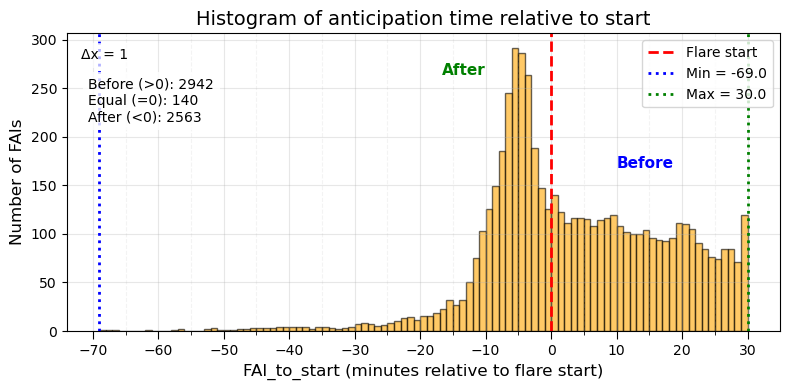

In [151]:
histogram1 = plot_histogram_with_reference(df_associated, 'FAI_to_start', 
                                             delta_x=1, figsize=(8,4), 
                                             save_plot=True, graphics_dir=graphics_dir, 
                                             plot_name=None, dpi=300)

✓ Gráfica guardada en: Analysis_FAI/Analysis_FAI_T7-14_EM0.005_dur3min/Graphics_filtered_W30min/histogram_FAI_to_peak_dx1.png


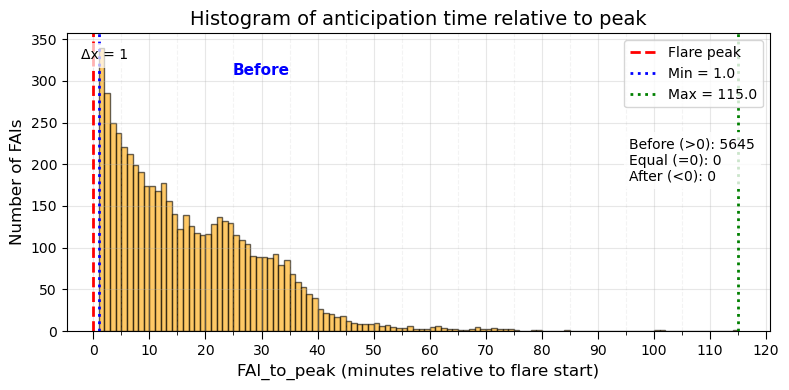

In [152]:
histogram2 = plot_histogram_with_reference(df_associated, 'FAI_to_peak', 
                                             delta_x=1, figsize=(8,4), 
                                             save_plot=True, graphics_dir=graphics_dir, 
                                             plot_name=None, dpi=300,
                                             text_x=0.8, text_y=0.65)

✓ Gráfica guardada en: Analysis_FAI/Analysis_FAI_T7-14_EM0.005_dur3min/Graphics_filtered_W30min/histogram_FAI_to_end_dx1.png


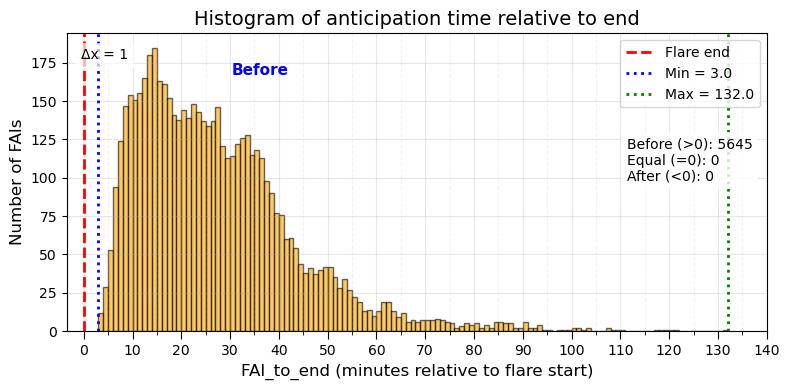

In [153]:
histogram1 = plot_histogram_with_reference(df_associated, 'FAI_to_end', 
                                             delta_x=1, figsize=(8,4), 
                                             save_plot=True, graphics_dir=graphics_dir, 
                                             plot_name=None, dpi=300,
                                             text_x=0.8, text_y=0.65)

## histogramas relativos al rise time

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

def plot_relative_histogram(df, column_numerator, column_denominator='F_StartPeak', 
                           delta_x=0.1, figsize=(10,5), 
                           save_plot=False, graphics_dir=None, 
                           plot_name=None, dpi=300,
                           text_x=0.03, text_y=0.85):
    """
    Crea un histograma relativo al tiempo de rise time del flare
    
    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame que contiene los datos
    column_numerator : str
        Columna para el numerador (ej: 'FAI_to_start')
    column_denominator : str, default='F_StartPeak'
        Columna para el denominador (rise time)
    delta_x : float, default=0.1
        Tamaño de los bins (fracción del rise time)
    figsize : tuple, default=(10,5)
        Tamaño de la figura
    save_plot : bool, default=False
        Si es True, guarda la gráfica
    graphics_dir : str, optional
        Directorio donde guardar las gráficas
    plot_name : str, optional
        Nombre del archivo de la gráfica. Si es None, se genera automáticamente
    dpi : int, default=300
        Resolución para guardar la imagen
    text_x, text_y : float
        Posición del texto de estadísticas en coordenadas de ejes
    """
    
    # Calcular la columna relativa
    df_temp = df.copy()
    df_temp['relative_column'] = df_temp[column_numerator] / df_temp[column_denominator]
    
    # Datos (eliminar NaN e infinitos)
    x = df_temp['relative_column'].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Definir bins
    min_val = x.min()
    max_val = x.max()
    min_val_ajustado = delta_x * np.floor(min_val / delta_x)
    max_val_ajustado = delta_x * np.ceil(max_val / delta_x)
    bin_edges = np.arange(min_val_ajustado, max_val_ajustado + delta_x, delta_x)

    # Calcular histograma
    counts, edges = np.histogram(x, bins=bin_edges)
    bin_width = edges[1] - edges[0]
    # DETERMINAR EL TIPO DE REFERENCIA SEGÚN EL NOMBRE DE LA COLUMNA
    column_lower = column_numerator.lower()
    if 'peak' in column_lower:
        reference_type = 'peak'
        reference_label = 'Flare peak'
        before_text = 'Before peak'
        after_text = 'After peak'
    elif 'end' in column_lower:
        reference_type = 'end'
        reference_label = 'Flare end'
        before_text = 'Before end'
        after_text = 'After end'
    else:  # Por defecto o si contiene 'start'
        reference_type = 'start'
        reference_label = 'Flare start'
        before_text = 'Before start'
        after_text = 'After start'

    
    # Título de la gráfica
    plot_title = f'Histogram of {reference_type} relative to flare rise time'

    # Gráfica
    plt.figure(figsize=figsize)
    plt.hist(x, bins=bin_edges, color='blue', edgecolor='black', alpha=0.7)

    # Líneas de referencia
    plt.axvline(0, color='red', linestyle='--', linewidth=2, label=reference_label)
    plt.axvline(min_val, color='blue', linestyle=':', linewidth=2, label=f'Min = {min_val:.2f}')
    plt.axvline(max_val, color='green', linestyle=':', linewidth=2, label=f'Max = {max_val:.2f}')

    # Etiquetas
    plt.xlabel(f'{column_numerator} / {column_denominator} (fraction of rise time)', fontsize=12)
    plt.ylabel('Number of FAIs', fontsize=12)
    plt.title(plot_title, fontsize=14)
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    
    # CONFIGURACIÓN MEJORADA DE TICKS - TICKS CADA 2 MINUTOS
    # Ticks principales cada 2 minutos (con números)
    tick_interval = 2  # Cambiado de 10 a 2 minutos
    start_tick_major = tick_interval * np.floor(min_val_ajustado / tick_interval)
    end_tick_major = tick_interval * np.ceil(max_val_ajustado / tick_interval)
    
    # Asegurar que el cero esté incluido
    if start_tick_major > 0:
        start_tick_major = 0
    if end_tick_major < 0:
        end_tick_major = 0
    
    major_ticks = np.arange(start_tick_major, end_tick_major + tick_interval, tick_interval)
    # Filtrar ticks que estén dentro del rango visual
    major_ticks = major_ticks[(major_ticks >= min_val_ajustado - tick_interval) & 
                             (major_ticks <= max_val_ajustado + tick_interval)]
    
    plt.xticks(major_ticks)
    
    # Ticks menores cada 1 minuto (sin números) - SIEMPRE DESDE CERO
    minor_interval = 1  # Ticks menores cada 1 minuto
    start_tick_minor = minor_interval * np.floor(min_val_ajustado / minor_interval)
    end_tick_minor = minor_interval * np.ceil(max_val_ajustado / minor_interval)
    
    # Asegurar que el cero esté incluido en los ticks menores también
    if start_tick_minor > 0:
        start_tick_minor = 0
    if end_tick_minor < 0:
        end_tick_minor = 0
    
    minor_ticks = np.arange(start_tick_minor, end_tick_minor + minor_interval, minor_interval)
    # Filtrar ticks menores dentro del rango visual
    minor_ticks = minor_ticks[(minor_ticks >= min_val_ajustado - minor_interval) & 
                             (minor_ticks <= max_val_ajustado + minor_interval)]
    
    plt.gca().set_xticks(minor_ticks, minor=True)
    
    # Configurar estilo de los ticks
    plt.gca().tick_params(axis='x', which='minor', 
                         length=2,           # Más cortos que los major
                         color='black',      
                         direction='out')    

    plt.gca().tick_params(axis='x', which='major', 
                         length=4,           # Longitud moderada
                         color='black')
    
    # Ocultar las etiquetas de los ticks menores
    plt.gca().tick_params(axis='x', which='minor', labelbottom=False)
    
    # Grid solo para los ticks principales (más visible)
    plt.grid(alpha=0.3, which='major')
    # Grid más sutil para los ticks menores
    plt.grid(alpha=0.1, which='minor', linestyle=':')


    # Texto informativo
    plt.text(0.02, 0.95, 
             f'Δx = {bin_width:.2f}',
             transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    # Estadísticas
    n_before = (x > 0).sum()   # FAI antes del start
    n_equal  = (x == 0).sum()  # FAI en el start
    n_after  = (x < 0).sum()   # FAI después del start

    plt.text(text_x, text_y,
             f'Before (>0): {n_before}\nEqual (=0): {n_equal}\nAfter (<0): {n_after}',
             transform=plt.gca().transAxes,
             ha='left', va='top',
             fontsize=10,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

        
    

    plt.tight_layout()
    
    # Guardar la imagen si se solicita
    if save_plot:
        if plot_name is None:
            safe_column_name = f"{column_numerator}_rel_{column_denominator}"
            safe_column_name = safe_column_name.replace(' ', '_').replace('/', '_')
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            plot_name = f"relative_histogram_{safe_column_name}_dx{delta_x}.png"
        elif not plot_name.lower().endswith(('.png', '.jpg', '.jpeg', '.pdf', '.svg')):
            plot_name += '.png'
        
        if graphics_dir is not None:
            save_path = os.path.join(graphics_dir, plot_name)
        else:
            save_path = plot_name
        
        os.makedirs(os.path.dirname(save_path) if os.path.dirname(save_path) else '.', 
                   exist_ok=True)
        
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
        print(f"✓ Gráfica guardada en: {save_path}")
    
    plt.show()
    
    # Retornar estadísticas
    return {
        'min': min_val,
        'max': max_val,
        'n_before': n_before,
        'n_equal': n_equal,
        'n_after': n_after,
        'total': len(x),
        'bin_width': bin_width,
        'saved_path': save_path if save_plot else None,
        'data_used': x  # Retorna los datos usados por si se necesitan
    }

# 

✓ Gráfica guardada en: Analysis_FAI/Analysis_FAI_T7-14_EM0.005_dur3min/Graphics_filtered_W30min/relative_histogram_FAI_to_start_rel_F_StartPeak_dx0.5.png


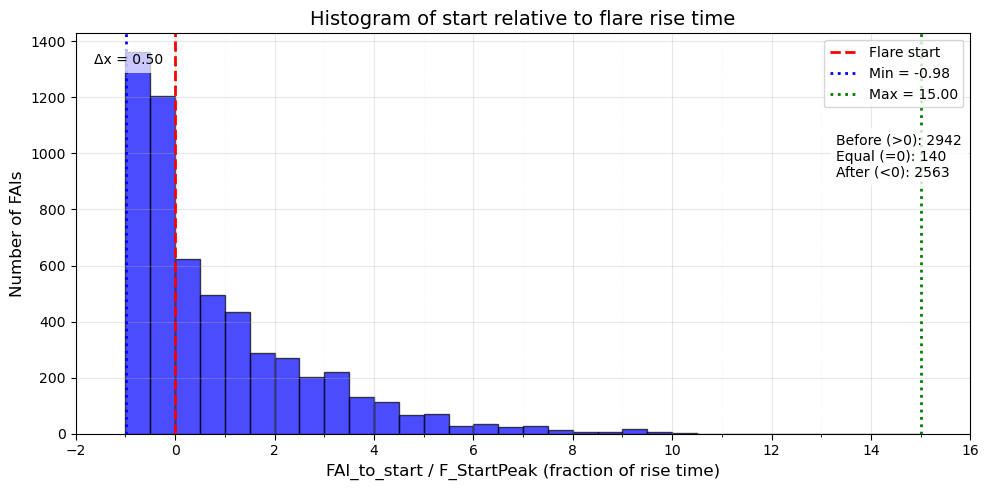

In [159]:
stats1 = plot_relative_histogram(df_associated, 'FAI_to_start', 
                           delta_x=0.5, figsize=(10,5), 
                           save_plot=True, graphics_dir=graphics_dir, 
                           plot_name=None, dpi=300,
                           text_x=0.85, text_y=0.75)

✓ Gráfica guardada en: Analysis_FAI/Analysis_FAI_T7-14_EM0.005_dur3min/Graphics_filtered_W30min/relative_histogram_FAI_to_peak_rel_F_StartPeak_dx0.5.png


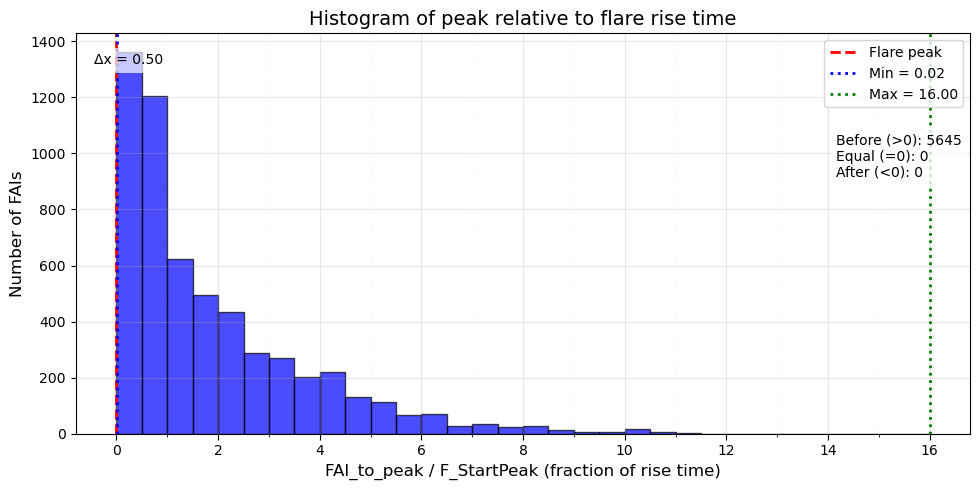

In [160]:
stats2 = plot_relative_histogram(df_associated, 'FAI_to_peak', 
                           delta_x=0.5, figsize=(10,5), 
                           save_plot=True, graphics_dir=graphics_dir, 
                           plot_name=None, dpi=300,
                           text_x=0.85, text_y=0.75)

✓ Gráfica guardada en: Analysis_FAI/Analysis_FAI_T7-14_EM0.005_dur3min/Graphics_filtered_W30min/relative_histogram_FAI_to_end_rel_F_StartPeak_dx0.5.png


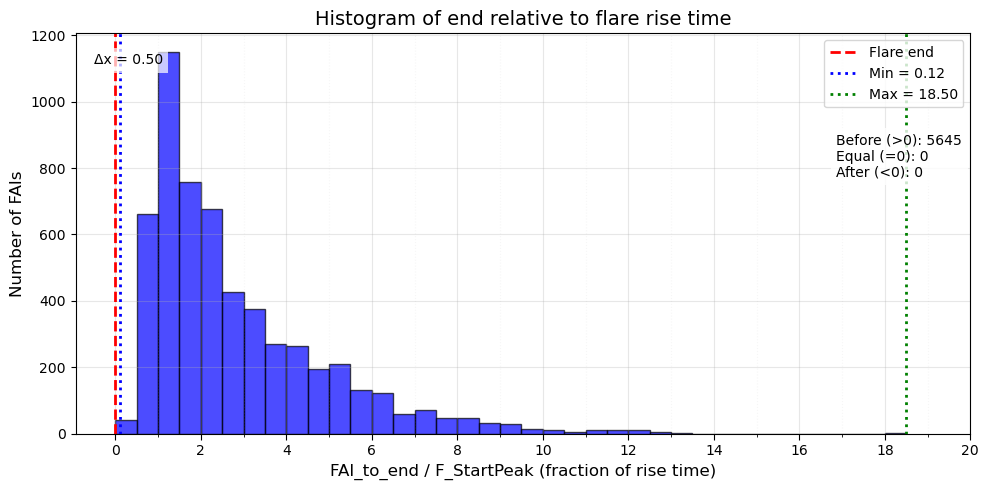

In [161]:
stats3 = plot_relative_histogram(df_associated, 'FAI_to_end', 
                           delta_x=0.5, figsize=(10,5), 
                           save_plot=True, graphics_dir=graphics_dir, 
                           plot_name=None, dpi=300,
                           text_x=0.85, text_y=0.75)

## pruebas

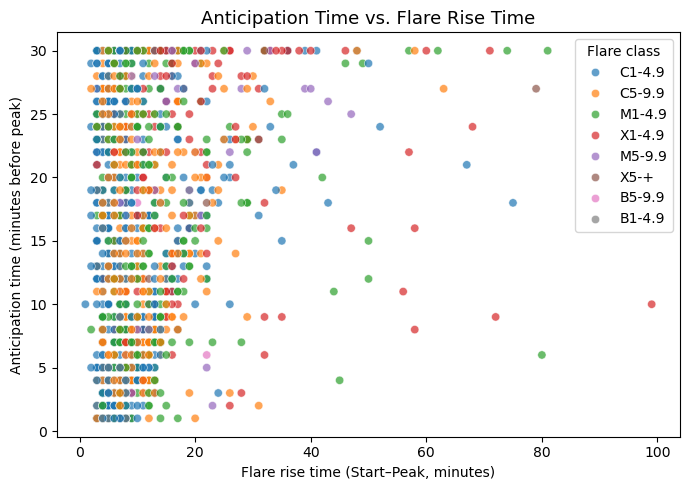

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_anticipation_time, x="StartPeak", y="AnticipationPeak", hue="ClassGroup", alpha=0.7)
plt.title("Anticipation Time vs. Flare Rise Time", fontsize=13)
plt.xlabel("Flare rise time (Start–Peak, minutes)")
plt.ylabel("Anticipation time (minutes before peak)")
plt.legend(title="Flare class")
plt.tight_layout()
plt.savefig(os.path.join(graphics_dir, "scatter_anticipation_vs_risetime.png"), dpi=300)
plt.show()


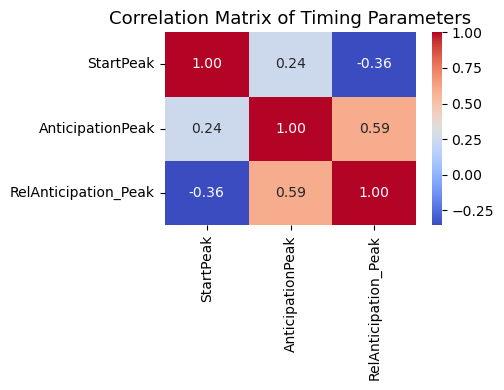

In [ ]:
corr = df_anticipation_time[["StartPeak", "AnticipationPeak", "RelAnticipation_Peak"]].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Timing Parameters", fontsize=13)
plt.tight_layout()
plt.savefig(os.path.join(graphics_dir, "corr_matrix_timings.png"), dpi=300)
plt.show()
